<H1><font color=blue>SENTIMATE ANALYSIS ON PRODUCT REVIWE AND IMPLEMETING AUTOMATION ON RATING </H1>

In [2]:
import pandas as pd
import matplotlib.pyplot as pt
from textblob import TextBlob
df=pd.read_csv('final_review.csv',usecols=['review sub'])
pd.set_option('display.max_colwidth',1)

<U><H1>SENTIMENTAL EVALUATING</H1></U>
<P>EVALUATING THE SENTIMENT IN EACH PRODUCT REVIEW AND PROVIDING THE VALUE WITH THE HELP OF TEXT BLOB</P>

In [3]:
words=list()
values=list()
for index,row in df.iterrows():
    words.append(df.iloc[index,0])
for index in range(len(words)):
    blob=TextBlob(words[index])
    values.append(blob.polarity)
print(words)


["Text Messaging Doesn't Work", 'Love This Phone', 'Love the Phone, BUT...!', 'Great phone service and options, lousy case!', 'Worked great for me', 'Wanna cool Nokia? You have it here!', 'Problem with 3588i universal headset', 'cool phone!!!!!!!!', 'Pissed off-a little bit', "works great, but don't dropt it", 'Slow, annoying, fragile, heavy, and bulky...', 'Worth paying more for something else.', 'Great free phone for Sprint customers.', 'Stupid phone', 'Exellent Service', 'I love it', 'Phones locked', 'Excellent product', 'WARNING', 'NEXTEL BOOST PHONE', 'Nice, but', "It seems it doesn't work with the existing AT&T SIM card.", 'Supply are needed', 'Five Stars', 'does the job', 'Awesome with a But!!', 'One Star', 'Is cheap but ok quality', 'Three Stars', 'This phone gave me a concussion. and may come with a faulty battery.', 'Tough phone', '4-1/2 years!', 'simply great!', 'More than great', 'motorola c168i', 'Good little phone', 'Great phone', 'Perfect Bare-Bones and Practically Indes

In [4]:
dt=pd.DataFrame(values)    
dt.to_csv('sub_reviews_rate')
dy=pd.read_csv('final_review.csv',usecols=['Mobile Name'])
pd.set_option('display.max_colwidth',1)
dr=dy.join(df)
dr=dr.join(dt)
dr.rename(columns=({0:'sub_review_rate'}),inplace=True)
print(dr)


                                                                                             Mobile Name  \
0     Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen       
1     Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen       
2     Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen       
3     Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen       
4     Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen       
...                                                                                              ...       
1496  Samsung Focus I917 Unlocked Phone with Windows 7 OS, 5 MP Camera, and Wi-Fi--No Warranty (Black)\t   
1497  Samsung Focus I917 Unlocked Phone with Windows 7 OS, 5 MP Camera, and Wi-Fi--No Warranty (Black)\t   
1498  Samsung Focus I917 Unl

<U><H1>DATA FILTERING</H1></U>
<P>TO PERFORM THE BETTER DATA CLASSIFICATION I REMOVED SOME UNWANTED COLUMNS FROM THE DATA SET </P>

In [5]:
rt=dr.groupby(['Mobile Name']).mean().groupby('Mobile Name')['sub_review_rate'].mean()
rt.to_csv('mobile_sub_review_rate.csv')
rr=pd.read_csv('mobile_sub_review_rate.csv',index_col=False)
# sub_reviews_rate  with a Mobile Name
rt=rr.sort_values('sub_review_rate',ascending=False)
# product_review with a Mabile Name
yt=pd.read_csv('final_review.csv')
yt.head(5)

,Model no,Mobile Name,Mobile Brand,customer Name,review sub,product review,sentiment_rate
0,B0000SX2UC,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen,PCS Phone,Luke Wyatt,Text Messaging Doesn't Work,"Due to a software issue between Nokia and Sprint this phone's text messaging capabilities don't work with Sprint's system and won't until a software patch comes out ""some time in the next few months"". You will have to spend at least 1 hour with Sprint's award winning customer service team to find someone who will admit this to you. The problem is that Nokia designed their phones so that incoming messages are retrieved quickly and then viewed ""offline"" the way most providers work. Sprint, however, likes to have people hook up to their server first and then stay connected, burning minutes while they check their inbox, compose a reply and wait for the Sprint server to respond so they can send it out. Innovation in money-making at its finest.",0.119792
1,B0000SX2UC,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen,PCS Phone,Brooke,Love This Phone,"This is a great, reliable phone. I also purchased this phone after my samsung A460 died. The menu is easily comprehendable and speed dialing is available for around 300 numbers. Voice dialing is also a nice feature, but it takes longer than speed dialing. The only thing that bothers me is the games...Nokia seems to have taken snake (1 and 2) off their phones. There is a skydiving game, bowling, and tennis (like pong). The ringers are very nice, and a feature is available to choose a different ringer for each person calling. However, ringtones are not available online to download to this phone. You're pretty much stuck with what you have. There are vibrating ringtones and regular (midi) polyphonic tones. All they need are covers in a reasonable price range...",0.247381
2,B0000SX2UC,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen,PCS Phone,amy m. teague,"Love the Phone, BUT...!","I love the phone and all, because I really did need one, but I didn't expect the price of the bill when I received one. Also, I've had my phone for a little over two months now and still have yet to receive my free accessories that were supposed to come with the phone. Every time I call the company, they keep telling me to wait a couple of weeks, and that I should be receiving it shortly. Other than that, I do love the phone and all that I am able to do with it; and I'm not just talking about making the phone calls! :)",0.301563
3,B0000SX2UC,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen,PCS Phone,tristazbimmer,"Great phone service and options, lousy case!","The phone has been great for every purpose it offers, except the day i bought it-i couldnt get the case off. You can take the case off to put your own pictures in the jaket which is super cool, but when i took it back to the store-an employee said they were meant to be hard to get off. Well, he could barely even get it off- he came close to snapping the casing in half. I was never able to get it off after that which isnt THAT big of a deal, but it got dirty under the clear casing and it looks really dirty now. MAKE SURE YOU CAN GET YOUR CASE ON AND OFF! Oh and you have to charge it ALL off the time.",0.070000
4,B0000SX2UC,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen,PCS Phone,J. White,Worked great for me,"Hello, I have this phone and used it until I decided to buy a flip phone. I have had NO problems with the battery or new cases--it has a new fish case on it now and it stays as well as the original one. I have added ring tones, and music so it was all good for me--as a matter of fact I am willing to sell this phone, the home charger and the car charger for a great deal--email me--(...)",0.399621


<U><H1>LINEAR REGRESSION </H1></U>
<P> AFTER PERFORMING THE VALUATION ON TEXTBLOP THOSE VALUES ARE PERFORMED THE LINEAR REGRESSION AND THE VALUES ARE GETTING GROUPED WITHIN THE SINGLE NAME</P>

<I><P>Here I used the actual formula for linear regression instead of importing and implementing it from libraries</P></I>

In [6]:
yy=pd.read_csv('final_review.csv',usecols=['Mobile Name','sentiment_rate'])
ui=yy.groupby(['Mobile Name']).mean().groupby('Mobile Name')['sentiment_rate'].mean()
ui.to_csv('only_big_review_stat.csv')
yu=pd.read_csv('only_big_review_stat.csv',usecols=['sentiment_rate'])
r2=rt.join(yu)
r2.head(2)
r2.to_csv('temp_file_rate.csv',index=0)

In [37]:
r4=pd.read_csv('temp_file_rate.csv')
r4

,Mobile Name,sub_review_rate,sentiment_rate
0,Motorola i570 Nextel iDen PTT rugged black cell phone\t,0.518663,0.164747
1,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen,0.364423,0.214501
2,"Samsung Focus I917 Unlocked Phone with Windows 7 OS, 5 MP Camera, and Wi-Fi--No Warranty (Black)\t",0.299198,0.238952
3,Samsung R355C Net 10 Unlimited\t,0.291424,0.252633
4,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE CELL PHONE,0.280335,0.156608
5,Samsung a167 Prepaid GoPhone (AT&T)\t,0.246812,0.180853
6,Motorola Barrage V860 Phone (Verizon Wireless)\t,0.242671,0.260287
7,"Samsung Rugby II, Black (AT&T)\t",0.217741,0.102323
8,Motorola i335 Cell Phone Boost Mobile,0.180324,0.140880
9,Samsung Convoy SCH-U640 Cell Phone Ruggedized PTT 2+ megapixel Camera for Verizon\t,0.176833,0.255726


<H1>PERFORMING THE DATA CLASSIFICATION FOR BETTER UNDERSTANDING OF THE DATA</H1>

In [8]:
holder=list()
for index,row in r4.iterrows():
      holder.append((r2.iloc[index,1]+r2.iloc[index,2])/2)
ff=pd.DataFrame(holder)
tt=r4.join(ff)
tt.rename(columns=({0:'final_emo_stat'}),inplace=True)
tt.sort_values('final_emo_stat',ascending=False)
tt.to_csv('sentiment_analysis.csv',index=False)
df=pd.DataFrame(holder)
df.to_csv("senti_fin.csv")
io=pd.read_csv('senti_fin.csv',names=["senti_rate","final rating"],index_col=False)
colname=["index","final_rating"]
dy=pd.read_csv('senti_fin.csv',names=colname,index_col=False)
dy.to_csv("senti_fin.csv")
dy

,index,final_rating
0,NaN,0.000000
1,0.0,0.341705
2,1.0,0.289462
3,2.0,0.269075
4,3.0,0.272029
5,4.0,0.218471
6,5.0,0.213832
7,6.0,0.251479
8,7.0,0.160032
9,8.0,0.160602


<u><h1>PERFORMING PREDICTIONS ON LINEAR REGRESSION</h1></u>
<P>WITH A HELP OF PERFROMING LINEAR REGGERSION WE CAN PREDICT THE FUTURE RATING AS WELL, THE RED LINE INDICATING THE MEAN FLOW OF THE RATING AMONG THE PRODUCTS</P>

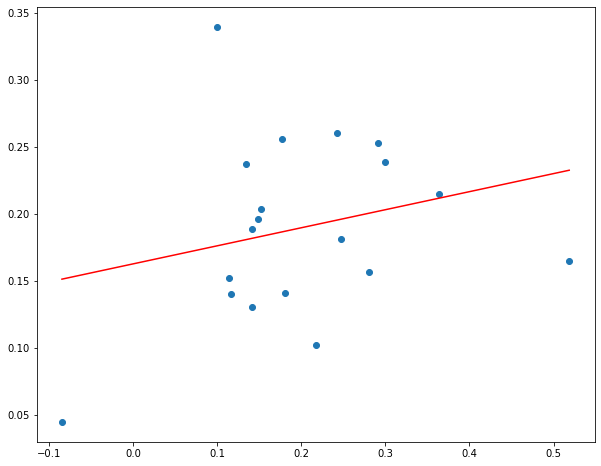

In [44]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
data = pd.read_csv('temp_file_rate.csv')  
X = data.iloc[:, 1].values.reshape(-1, 1) 
Y = data.iloc[:, 2].values.reshape(-1, 1) 
Z = data.iloc[:, 0]
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X) 
plt.figure(figsize=(10,8))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

<U><H1>AVERAGE RATING</H1></U>
<P>THIS PLOT VISUALIZE THE AVERAGE RATINGS BY BARPLOT HERE TEH AVERAGE RATING IS O.15 SO MOST OF THE MOBILE DEVICES RECEIVED THE AVERAGE RATING OF 0.15 AND THE LOW RATING OF 0.00, HIGH RATINGS ARE INDICATED AS 0.35</P>

In [ ]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
data = pandas.read_csv('senti_fin.csv',usecols=['final_rating'])
scatter_matrix(data)
plt.show()
data

<U><H1>LINE PLOT</H1></U>
<P>WITH A HELP OF A LINE PLOT IN SEABORN WE CAN FIND THE VARIOUS RATING </P>
<p>THIS PLOT VISUALIZE THE HIGH AND LOW RATING IN LINE PLOT FORMAT<P>


In [ ]:
import seaborn as slt
import matplotlib.pyplot as plt
data=pd.read_csv('sentiment_analysis.csv')
res=slt.lineplot(x='Mobile Name',y='sentiment_rate',data=data)
plt.figure(figsize = (30,10))
res.tick_params(axis='x', rotation=90)

<U><H1> BARPLOT</H1></U>


<P>THIS BARLPOT VISUALIZATION EXPRESS THE RATING OF ALL MOBILE WHICH INVOLVED IN THIS ANALYSIS </P>

<P>THIS LINEAR PLOT HAS A MINIMUM AND MAXIMUM RATING IN DIFFERENT LENGTHS OF BARS<P> 

C:\Users\god\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\god\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


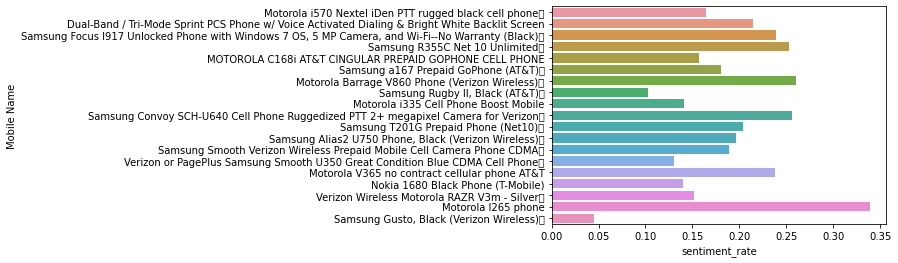

<Figure size 5040x2520 with 0 Axes>

In [10]:
import seaborn as slt
data=pd.read_csv('sentiment_analysis.csv')
res=slt.barplot(y=data['Mobile Name'],x=data['sentiment_rate'])
pt.figure(figsize = (70,35))
pt.show()

<H1>CONCLUSION</H1>
<P>AT THE END OF THE PROJECT WE ANALYZED THE RATING OF EACH PRODUCT FROM THE REVIEWS, THIS WILL A SIMILAR VALUES CLOSER TO THE ORIGINAL RATING OF THOSE PRODUCTS </P>